In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Matthew1906/COMP67450001-FinalProject/main/datasets/train.csv', index_col=0)
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

### Drop Columns

In [4]:
print(f"Size of the dataset is {len(df)}")
for col in df.columns:
  print(f"There are {df[col].nunique()} unique values in the `{col}` column.")

Size of the dataset is 103904
There are 103904 unique values in the `id` column.
There are 2 unique values in the `Gender` column.
There are 2 unique values in the `Customer Type` column.
There are 75 unique values in the `Age` column.
There are 2 unique values in the `Type of Travel` column.
There are 3 unique values in the `Class` column.
There are 3802 unique values in the `Flight Distance` column.
There are 6 unique values in the `Inflight wifi service` column.
There are 6 unique values in the `Departure/Arrival time convenient` column.
There are 6 unique values in the `Ease of Online booking` column.
There are 6 unique values in the `Gate location` column.
There are 6 unique values in the `Food and drink` column.
There are 6 unique values in the `Online boarding` column.
There are 6 unique values in the `Seat comfort` column.
There are 6 unique values in the `Inflight entertainment` column.
There are 6 unique values in the `On-board service` column.
There are 6 unique values in th

In [5]:
df.drop(columns = ['id'], inplace=True)

### Handle Missing Values

In [6]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

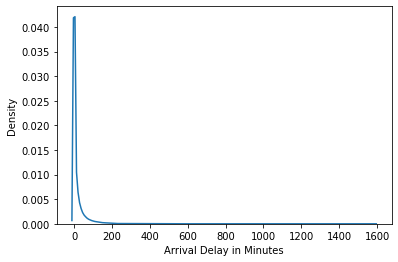

In [7]:
sns.kdeplot(data=df, x='Arrival Delay in Minutes')

In [8]:
print(f"The mean of the column is {df['Arrival Delay in Minutes'].mean()}")
print(f"The median of the column is {df['Arrival Delay in Minutes'].median()}")
print(f"The mode of the column is {df['Arrival Delay in Minutes'].mode()}")

The mean of the column is 15.178678301832152
The median of the column is 0.0
The mode of the column is 0    0.0
dtype: float64


In [9]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

### Convert Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [11]:
# Continuous Data
num = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
# Discrete Data
cat = [x for x in df.columns.tolist() if x not in num]
# Just printing them out to check:v
print(num)
print(cat)

['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']


In [12]:
df[cat] = df[cat].astype('category')
df.dtypes

Gender                               category
Customer Type                        category
Age                                     int64
Type of Travel                       category
Class                                category
Flight Distance                         int64
Inflight wifi service                category
Departure/Arrival time convenient    category
Ease of Online booking               category
Gate location                        category
Food and drink                       category
Online boarding                      category
Seat comfort                         category
Inflight entertainment               category
On-board service                     category
Leg room service                     category
Baggage handling                     category
Checkin service                      category
Inflight service                     category
Cleanliness                          category
Departure Delay in Minutes              int64
Arrival Delay in Minutes          

# Exploratory Data Analysis

### Categorical Variables

First of all, we have to categorize the columns, based on each case.

For the first one, we divide the columns that represent the ratings given by the passengers.

In [13]:
ratings = cat[4:-1]
len(ratings)
ratings

['Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness']

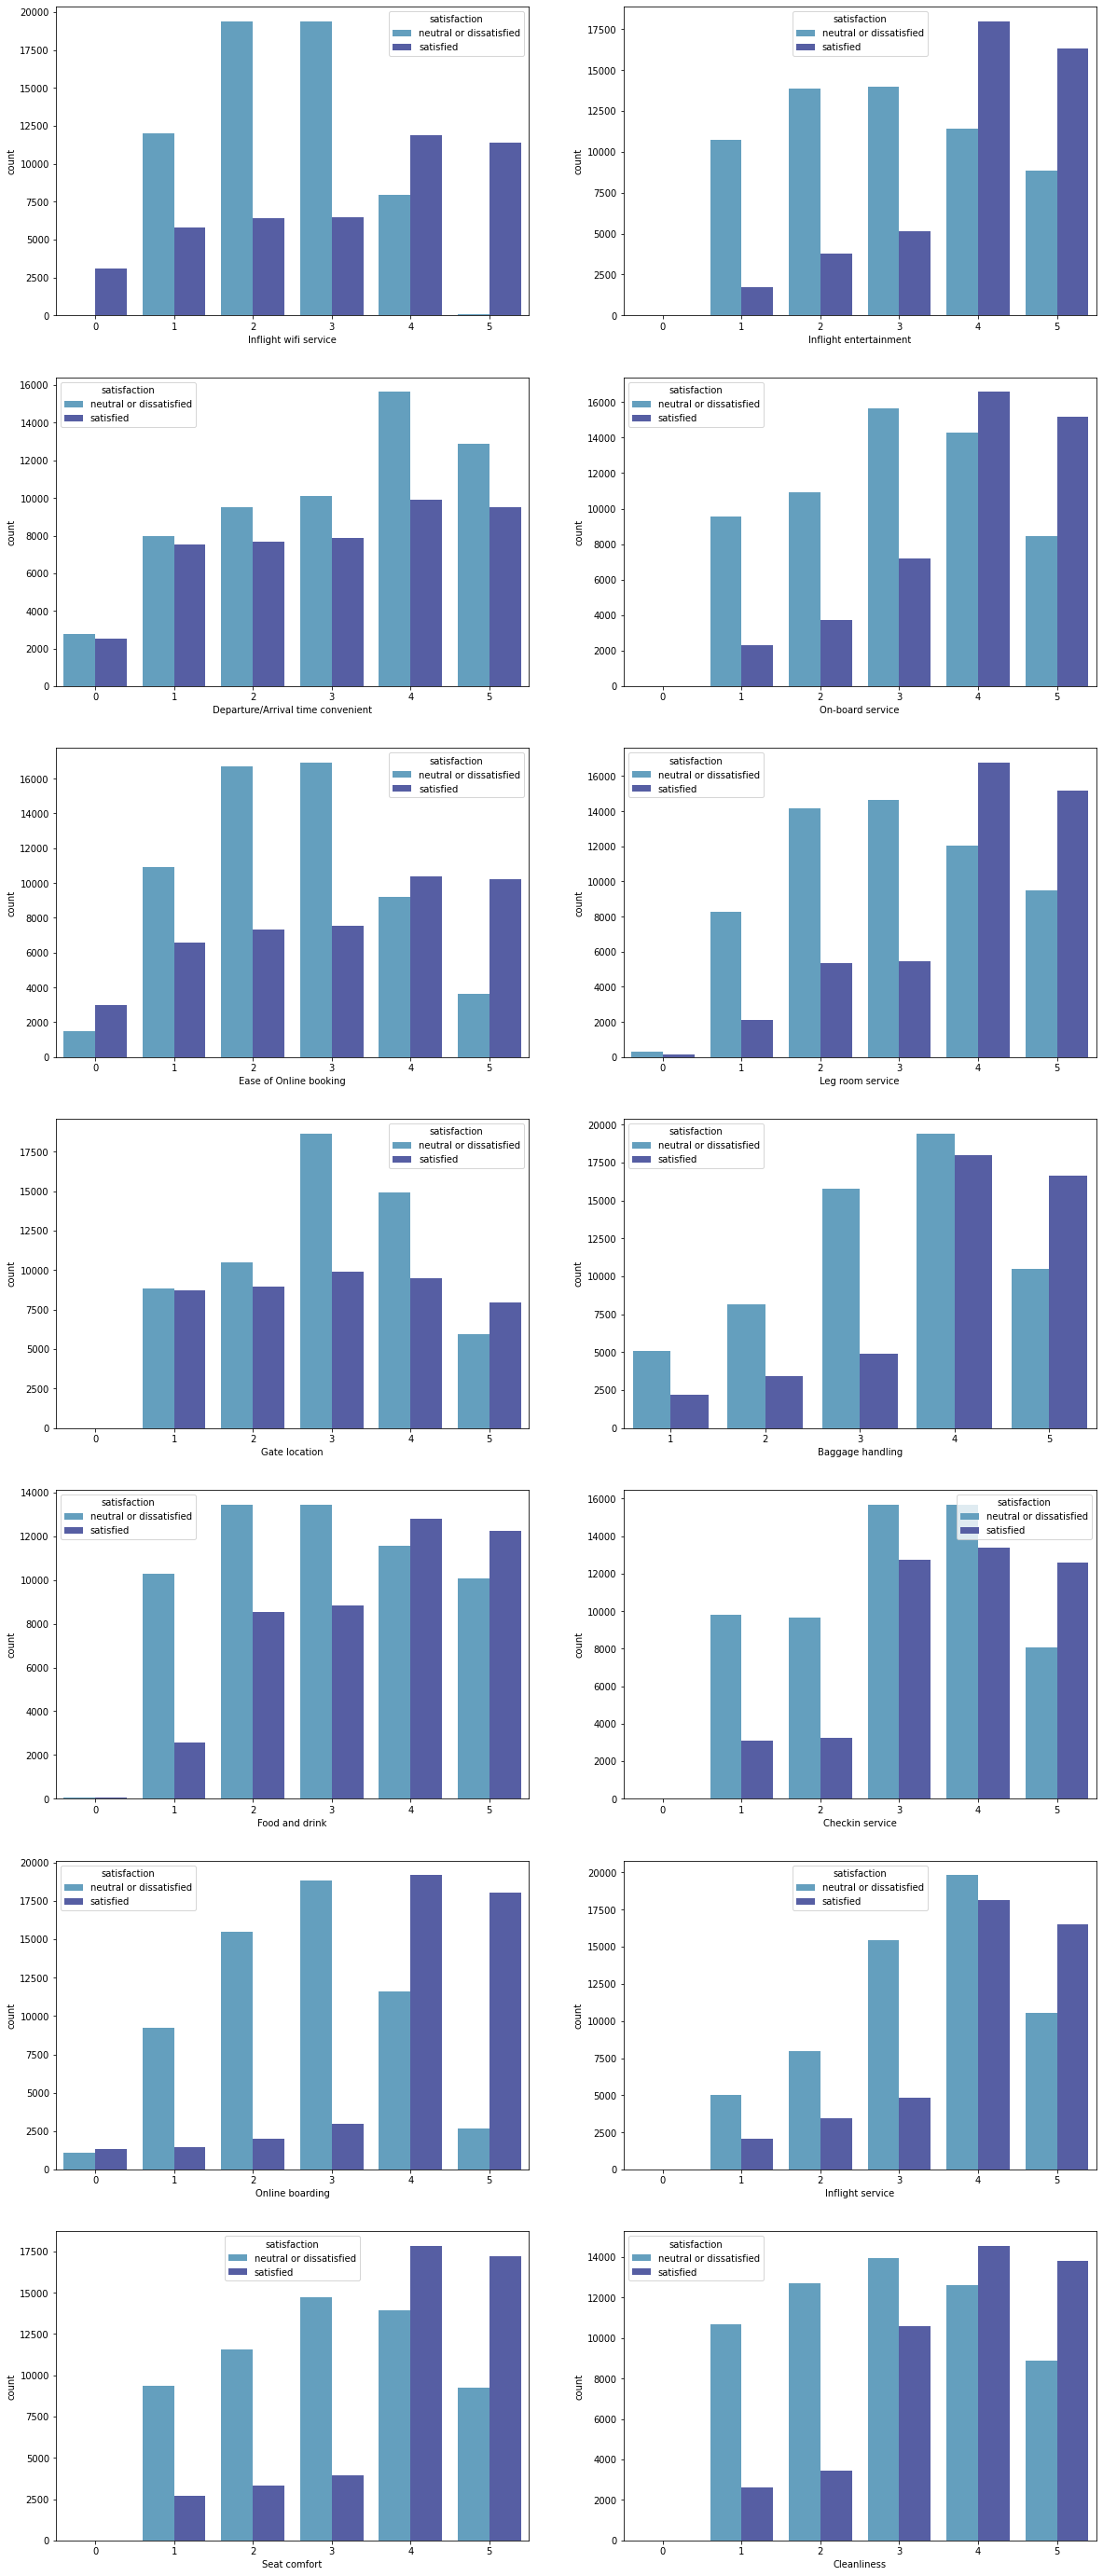

In [14]:
sns.set_palette('icefire')
fig, axes = plt.subplots(7, 2, figsize=(20,50))
index = 0
for idx in range(len(ratings)//2):
  sns.countplot(data = df, x= ratings[idx], hue = 'satisfaction', ax = axes[index, 0])
  sns.countplot(data = df, x= ratings[idx+len(ratings)//2], hue = 'satisfaction', ax = axes[index, 1])
  index +=1

Conclusion:
- People who are satisfied with the inflight wifi service, are really likely to be satisfied with the passenger airline
- The `Departure/Arrival Time Convenient` rating from the customer, doesn't affect the satisfaction of the customer

In [15]:
cat_not_ratings = [i for i in cat if i not in ratings]
cat_not_ratings.remove('satisfaction')
cat_not_ratings

['Gender', 'Customer Type', 'Type of Travel', 'Class']

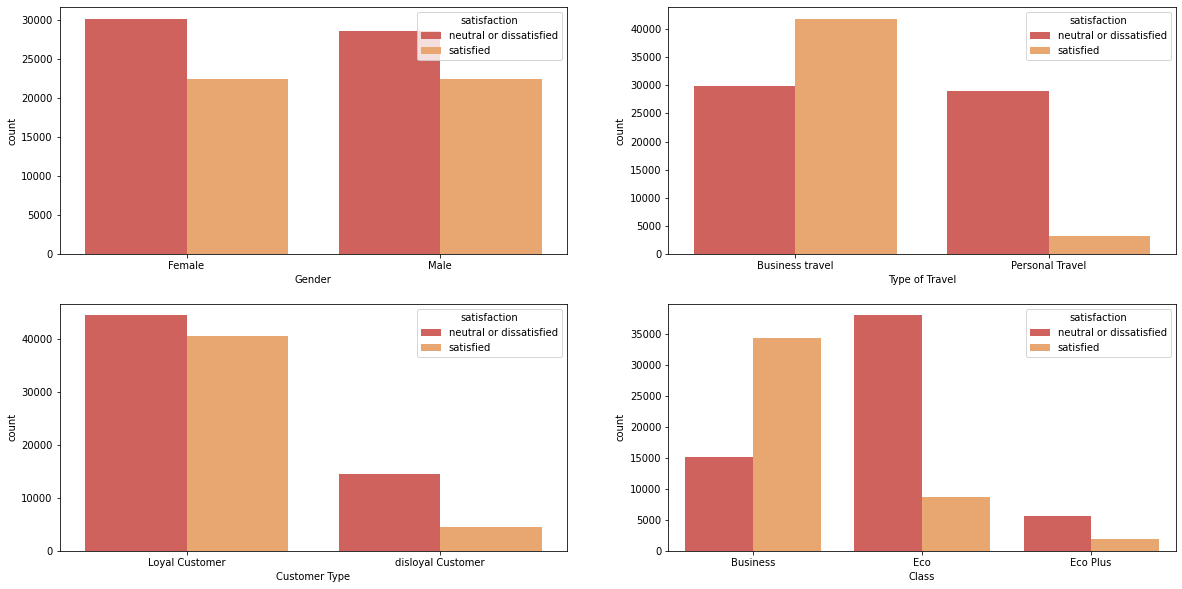

In [16]:
sns.set_palette('Spectral')
fig, axes = plt.subplots(2, 2, figsize=(20,10))
index = 0
for idx in range(len(cat_not_ratings)//2):
  sns.countplot(data = df, x= cat_not_ratings[idx], hue = 'satisfaction', ax = axes[index,0])
  sns.countplot(data = df, x= cat_not_ratings[idx+len(cat_not_ratings)//2], hue = 'satisfaction', ax = axes[index, 1])
  index +=1

- Most passengers who used Eco and Ecoplus Class, are really likely to be neutral or dissatisfied
- Passenger who are in a business travel majorly satisfied compared to dissatisfied ones, while the ones who are in a personal travel, majorly dissatisfied
- Loyalty of the customer does not increase the engagement of each customer towards satisfaction level

## Numerical Variables

In [17]:
df[num].describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


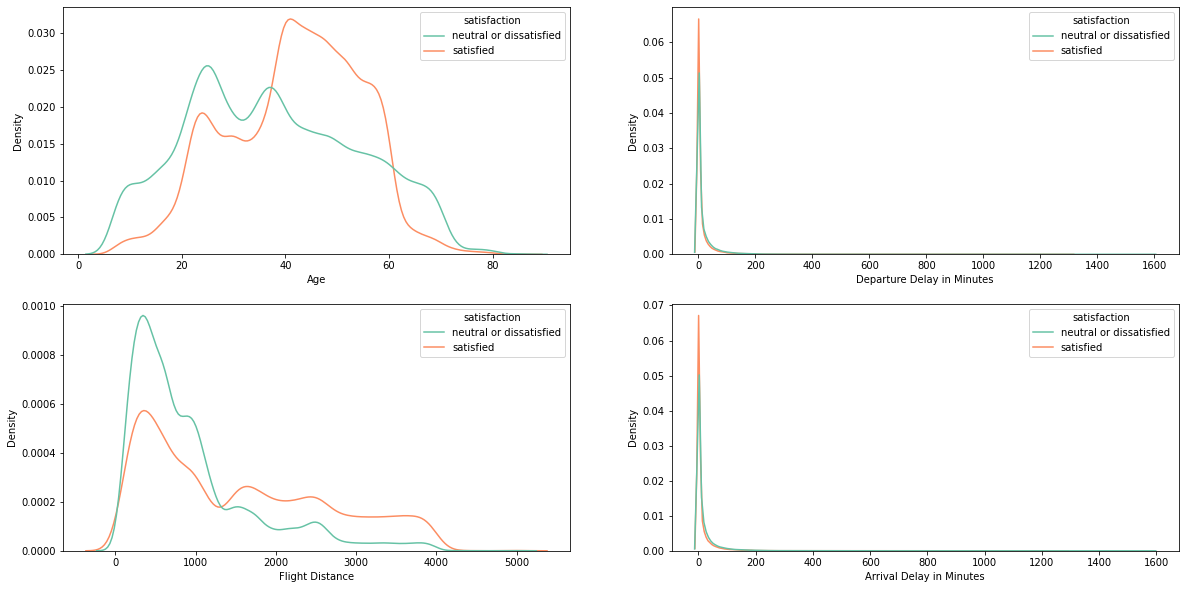

In [18]:
sns.set_palette('Set2')
fig, ax = plt.subplots(2,2, figsize = (20, 10))
idx = 0;
for i in range(len(num)//2):
  sns.kdeplot(data = df, x = num[i], hue = 'satisfaction', ax = ax[idx,0], common_norm = False)
  sns.kdeplot(data = df, x = num[i+len(num)//2], hue = 'satisfaction', ax = ax[idx,1], common_norm = False)
  idx+=1

plt.show()

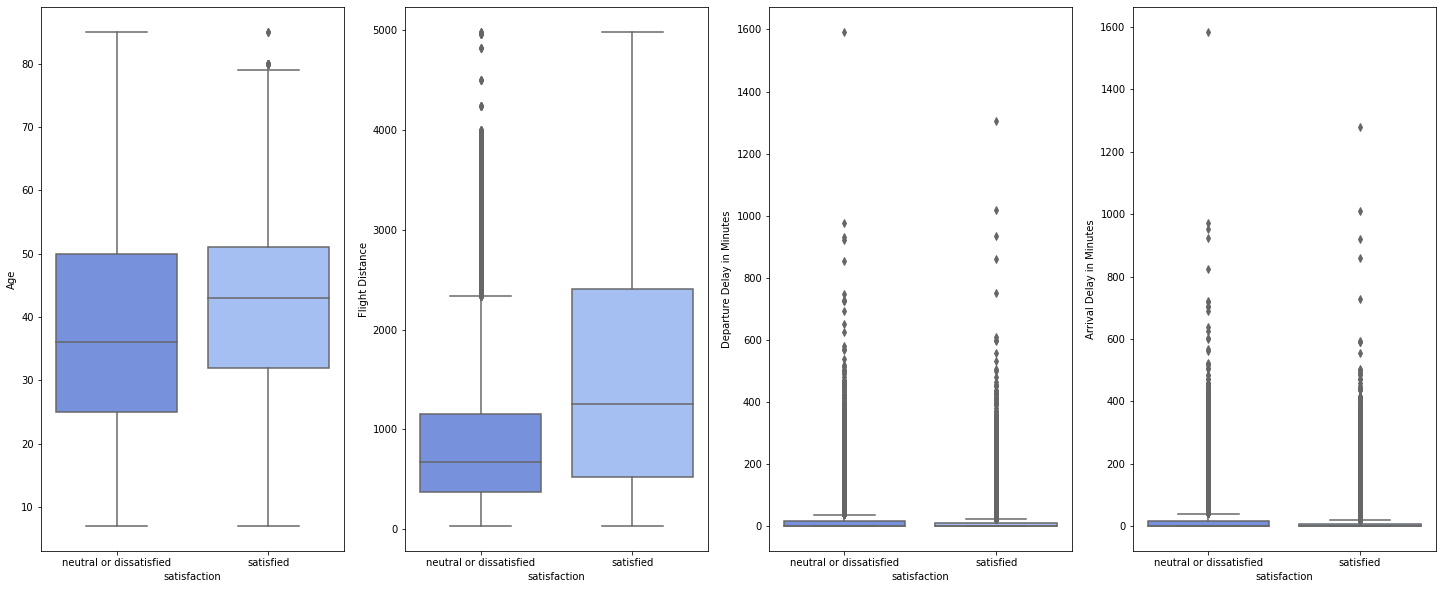

In [19]:
sns.set_palette('coolwarm')
fig, ax = plt.subplots(ncols = 4, figsize = (25, 10))
idx = 0;
for i in num:
  sns.boxplot(data = df, y = i, x = 'satisfaction', ax = ax[idx])
  idx+=1

plt.show()

Conclusion:
- Passenger with Age range between 40-60 are more likely to give satisfied feedback
- Most flights distance range between 0 - 1200, and the majority gives the `neutral or dissatisfied feedback`

In [20]:
df2 = df[df['Departure Delay in Minutes'] > 200].copy()
df2['satisfaction'].value_counts()

neutral or dissatisfied    497
satisfied                  277
Name: satisfaction, dtype: int64

In [21]:
df2 = df[df['Arrival Delay in Minutes'] > 200].copy()
df2['satisfaction'].value_counts()

neutral or dissatisfied    510
satisfied                  297
Name: satisfaction, dtype: int64

Passengers who experienced Departure or Arrival Delay more than 200 minutes, are 60% more likely to be dissatisfied with the airline experience.

### Casting Rating Columns back to Integer

This is needed to see the Correlations between the numerical columns

In [22]:
df[ratings] = df[ratings].astype(int)

In [23]:
num_combined = num+ratings+['satisfaction']
num_combined

['Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

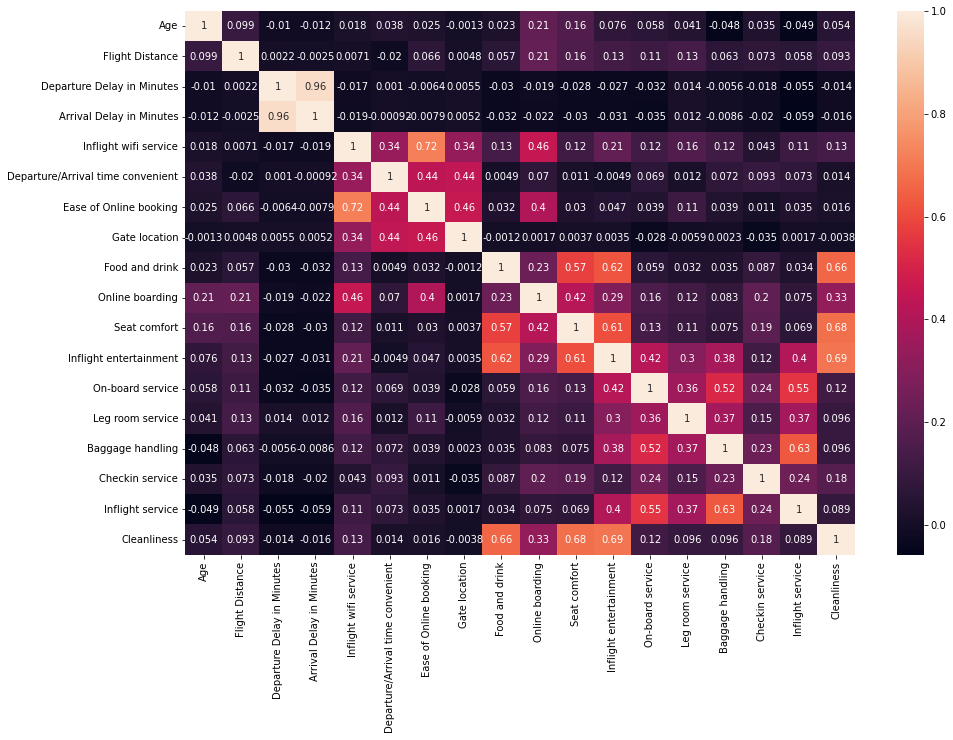

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df[num_combined].corr(), annot = True)
plt.show()

In [25]:
df.to_csv("processed.csv", index = False)

In [26]:
df.shape

(103904, 23)

Download the preprocessed data to be used for `Modelling`and `Evaluation`

In [27]:
from google.colab import  files
files.download('processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>